# Spending Habits - EDA

### Hipóteses a serem testadas
- As pessoas gastam mais no cartão de crédito.
- As pessoas não vão as lojas físicas com frequencia.
- As pessoas gastam mais online.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
df = pd.read_csv('spending_patterns_detailed.csv')
df.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [3]:
# Ajustando nome das colunas
df.columns = df.columns.str.replace(" ", "_")
print(df.columns)
print(f'data shape: {df.shape}')

Index(['Customer_ID', 'Category', 'Item', 'Quantity', 'Price_Per_Unit',
       'Total_Spent', 'Payment_Method', 'Location', 'Transaction_Date'],
      dtype='object')
data shape: (10000, 9)


In [4]:
# Sumário 

def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Customer_ID,object,0,0.0,0,200,10000,NaN,NaN,NaN,NaN,CUST_0159,CUST_0017,CUST_0094
Category,object,0,0.0,0,13,10000,NaN,NaN,NaN,NaN,Groceries,Friend Activities,Housing and Utilities
Item,object,0,0.0,0,48,10000,NaN,NaN,NaN,NaN,Milk,Dinner with Friends,Water Bill
Quantity,int64,0,0.0,0,5,10000,1.0,5.0,2.2372,1.481133,1,2,1
Price_Per_Unit,float64,0,0.0,0,7473,10000,1.0,74246.46,969.957948,6104.403843,1.28,74.69,76.06
Total_Spent,float64,0,0.0,0,8382,10000,1.11,352230.76,2534.75089,19676.741772,1.28,149.39,76.06
Payment_Method,object,0,0.0,0,4,10000,NaN,NaN,NaN,NaN,Debit Card,Debit Card,Digital Wallet
Location,object,0,0.0,0,3,10000,NaN,NaN,NaN,NaN,Mobile App,In-store,Mobile App
Transaction_Date,object,0,0.0,0,744,10000,NaN,NaN,NaN,NaN,2024-11-13,2023-05-04,2023-12-16


In [5]:
consumo_categoria = df.groupby('Category')['Total_Spent'].sum()

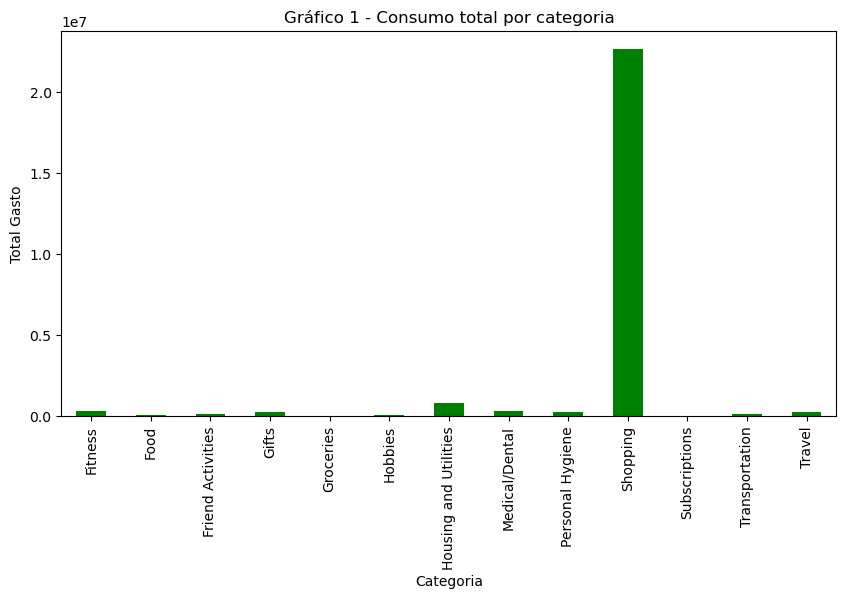

In [6]:
plt.figure(figsize=(10, 5))
consumo_categoria.plot(kind="bar", color='green')
plt.title("Gráfico 1 - Consumo total por categoria")
plt.xlabel("Categoria")
plt.ylabel("Total Gasto")
plt.xticks(rotation=90)
plt.show()

In [7]:
media_preco_uni = df.groupby('Category')['Price_Per_Unit'].mean()

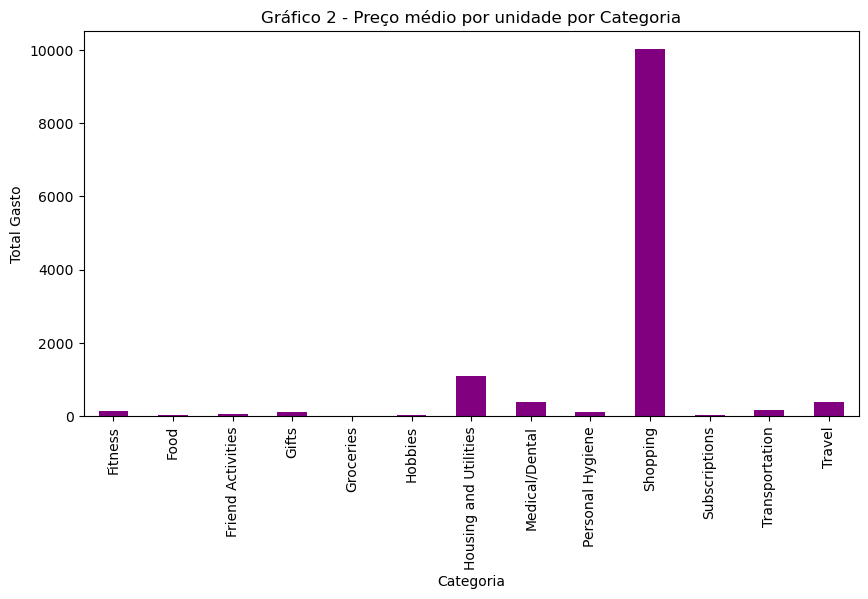

In [8]:
plt.figure(figsize=(10, 5))
media_preco_uni.plot(kind="bar", color='purple')
plt.title("Gráfico 2 - Preço médio por unidade por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Total Gasto")
plt.xticks(rotation=90)
plt.show()

In [9]:
total_payment_methods = df['Payment_Method'].value_counts()
print(total_payment_methods)

Digital Wallet    2560
Credit Card       2499
Cash              2478
Debit Card        2463
Name: Payment_Method, dtype: int64


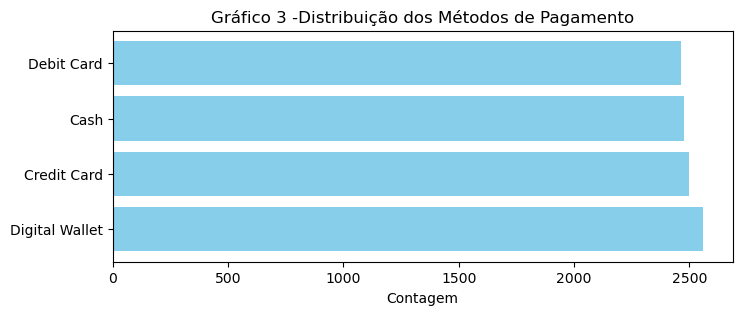

In [10]:
# Extraindo os labels (nomes dos métodos) e os valores
labels1 = total_payment_methods.index
values1 = total_payment_methods.values

plt.figure(figsize=(8, 3))
plt.barh(labels1, values1, color='skyblue')
plt.xlabel("Contagem")
plt.title("Gráfico 3 -Distribuição dos Métodos de Pagamento")
plt.show()

In [11]:
# Media gasta por metodo de pagamento
gasto_por_metodo = df.groupby('Payment_Method')['Total_Spent'].mean()
print(gasto_por_metodo)

Payment_Method
Cash              2943.382026
Credit Card       2613.641200
Debit Card        1529.752363
Digital Wallet    3029.116723
Name: Total_Spent, dtype: float64


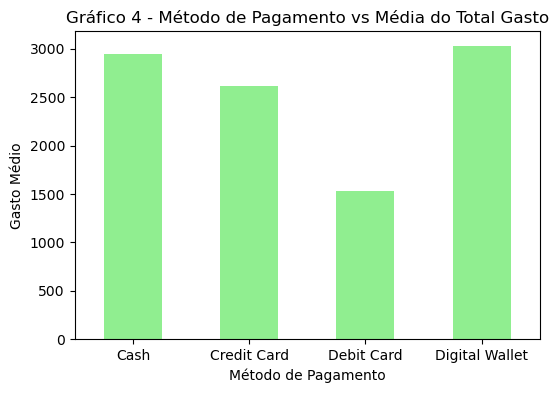

In [12]:
plt.figure(figsize=(6, 4))
gasto_por_metodo.plot(kind="bar", color='lightgreen')
plt.title("Gráfico 4 - Método de Pagamento vs Média do Total Gasto")
plt.xlabel("Método de Pagamento")
plt.ylabel("Gasto Médio")
plt.xticks(rotation=0)
plt.show()

In [13]:
total_location = df['Location'].value_counts()
print(total_location)

In-store      3387
Online        3307
Mobile App    3306
Name: Location, dtype: int64


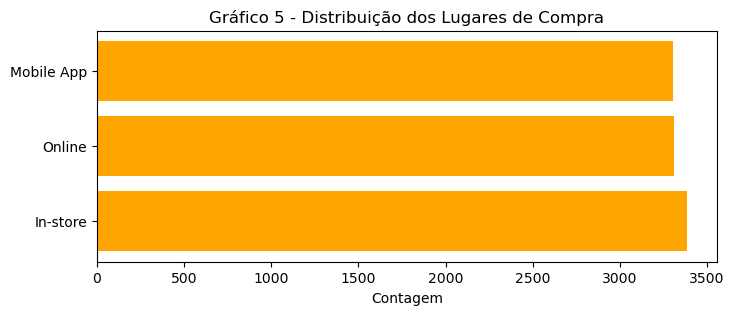

In [14]:
labels2 = total_location.index
values2 = total_location.values

plt.figure(figsize=(8, 3))
plt.barh(labels2, values2, color='orange')
plt.xlabel("Contagem")
plt.title("Gráfico 5 - Distribuição dos Lugares de Compra")
plt.show()

In [15]:
# Media gasta por local de compra
gasto_por_local = df.groupby('Location')['Total_Spent'].mean()
print(gasto_por_local)

Location
In-store      2367.071243
Mobile App    2593.588001
Online        2647.667575
Name: Total_Spent, dtype: float64


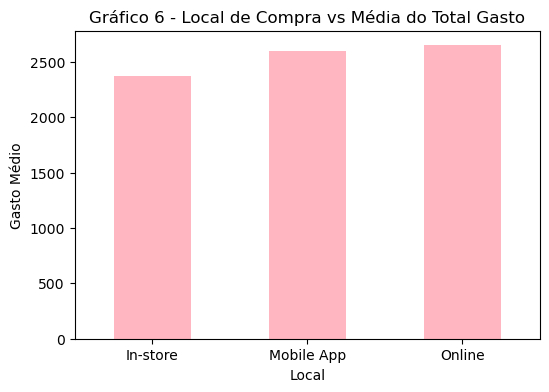

In [16]:
plt.figure(figsize=(6, 4))
gasto_por_local.plot(kind="bar", color='lightpink')
plt.title("Gráfico 6 - Local de Compra vs Média do Total Gasto")
plt.xlabel("Local")
plt.ylabel("Gasto Médio")
plt.xticks(rotation=0)
plt.show()

In [17]:
# Convertendo data de object para datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
tipo = df['Transaction_Date'].dtype
print(tipo)

datetime64[ns]


In [18]:
preco_categoria_mes = df.groupby([df['Transaction_Date'].dt.to_period('M'), 'Category'])['Price_Per_Unit'].mean()

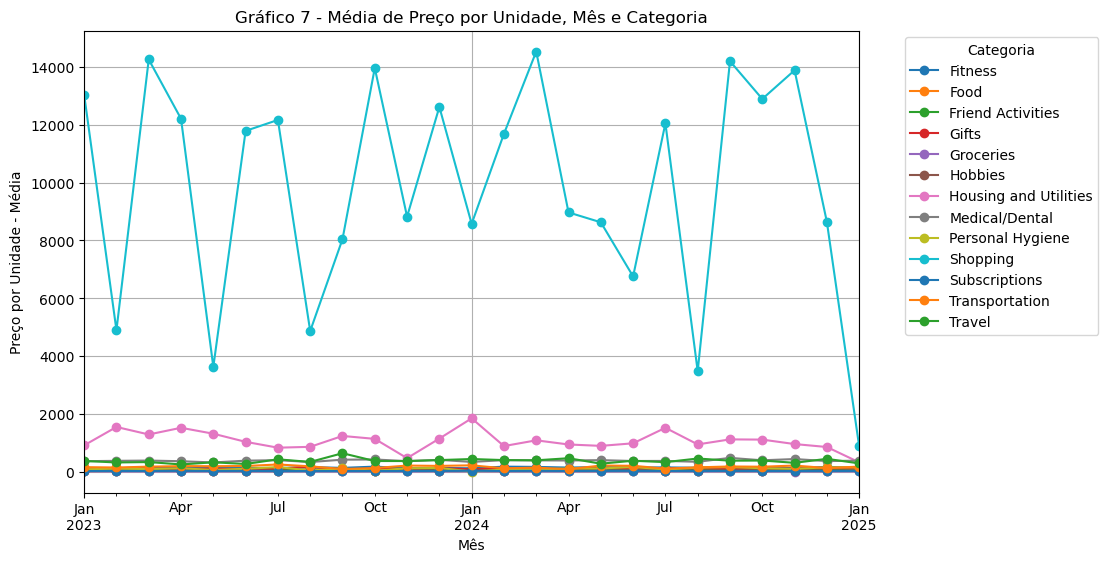

In [19]:
# Transforma a Series com MultiIndex em DataFrame, onde cada coluna corresponde a um 'Segmento'
preco_categoria_mes_df = preco_categoria_mes.unstack()

# Criação da figura e dos eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotagem usando o objeto Axes
preco_categoria_mes_df.plot(kind='line', marker='o', ax=ax)
ax.set_xlabel("Mês")
ax.set_ylabel("Preço por Unidade - Média")
ax.set_title("Gráfico 7 - Média de Preço por Unidade, Mês e Categoria")
ax.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.show()

### Percebe-se que os preços no Segmento "Shopping", além de mais altos, oscilam muito mais em relação as outras categorias.
### Vamos explorar mais esta categoria.

In [20]:
# Media de valor dos itns da categoria Shopping
Shopping = 'Shopping'

df_Shopping = df[df['Category'] == Shopping]

contagem_itens = df_Shopping['Item'].value_counts()
print(contagem_itens)

Electronics    204
Car            194
Shoes          192
Clothes        185
Name: Item, dtype: int64


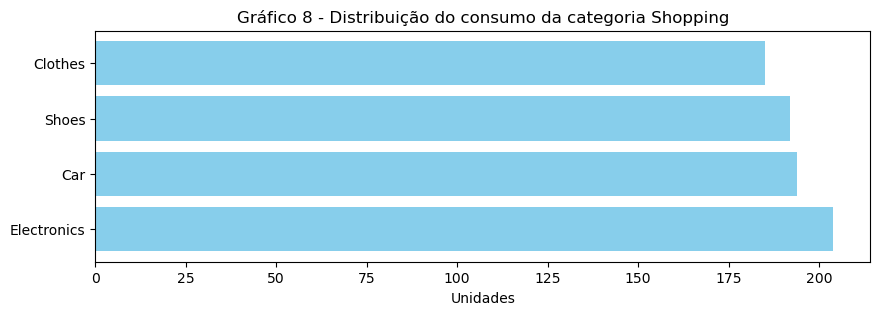

In [21]:
labels3 = contagem_itens.index
values3 = contagem_itens.values

plt.figure(figsize=(10, 3))
plt.barh(labels3, values3, color='skyblue')
plt.xlabel("Unidades")
plt.title("Gráfico 8 - Distribuição do consumo da categoria Shopping")
plt.show()

In [22]:
media_valor_Itens = df_Shopping.groupby('Item')['Price_Per_Unit'].mean()
print(media_valor_Itens)

Item
Car            38953.247165
Clothes           85.052541
Electronics      813.459461
Shoes            111.038385
Name: Price_Per_Unit, dtype: float64


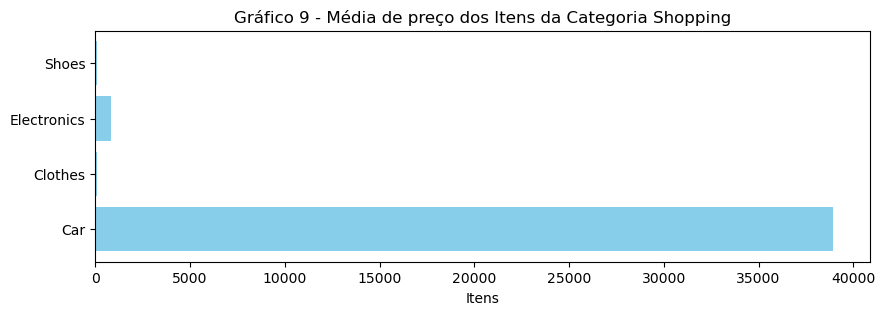

In [23]:
labels4 = media_valor_Itens.index
values4 = media_valor_Itens.values

plt.figure(figsize=(10, 3))
plt.barh(labels4, values4, color='skyblue')
plt.xlabel("Itens")
plt.title("Gráfico 9 - Média de preço dos Itens da Categoria Shopping")
plt.show()

In [24]:
# Frequencia dos métodos de pagamento de cada item da categoria Shopping
contagem_transacoes_shopping = df_Shopping.groupby(['Item', 'Payment_Method']).size().reset_index(name='Contagem')

print(contagem_transacoes_shopping)

           Item  Payment_Method  Contagem
0           Car            Cash        51
1           Car     Credit Card        48
2           Car      Debit Card        37
3           Car  Digital Wallet        58
4       Clothes            Cash        49
5       Clothes     Credit Card        35
6       Clothes      Debit Card        41
7       Clothes  Digital Wallet        60
8   Electronics            Cash        38
9   Electronics     Credit Card        63
10  Electronics      Debit Card        42
11  Electronics  Digital Wallet        61
12        Shoes            Cash        57
13        Shoes     Credit Card        49
14        Shoes      Debit Card        46
15        Shoes  Digital Wallet        40


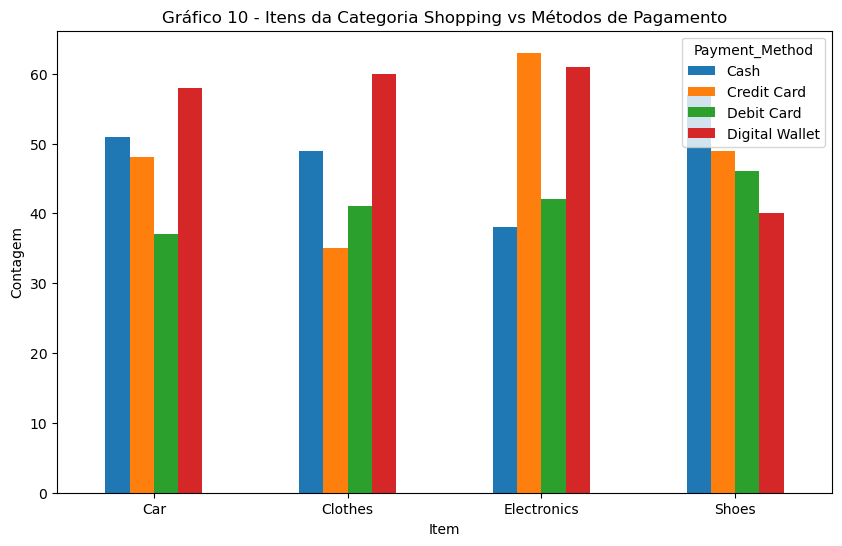

In [25]:
# Transformar os dados em uma tabela pivot:
pivot_payment = contagem_transacoes_shopping.pivot(index='Item', 
                                                   columns='Payment_Method', 
                                                   values='Contagem')

# Plotar o gráfico de barras agrupadas
pivot_payment.plot(kind='bar', figsize=(10, 6))

plt.xlabel("Item")
plt.ylabel("Contagem")
plt.title("Gráfico 10 - Itens da Categoria Shopping vs Métodos de Pagamento")
plt.xticks(rotation=0)
plt.legend(title="Payment_Method")
plt.show()

In [26]:
# Local de compra de cada item da categoria Shopping
contagem_locais_shopping = df_Shopping.groupby(['Item', 'Location']).size().reset_index(name='Contagem')

print(contagem_locais_shopping)

           Item    Location  Contagem
0           Car    In-store        60
1           Car  Mobile App        70
2           Car      Online        64
3       Clothes    In-store        61
4       Clothes  Mobile App        63
5       Clothes      Online        61
6   Electronics    In-store        62
7   Electronics  Mobile App        64
8   Electronics      Online        78
9         Shoes    In-store        72
10        Shoes  Mobile App        63
11        Shoes      Online        57


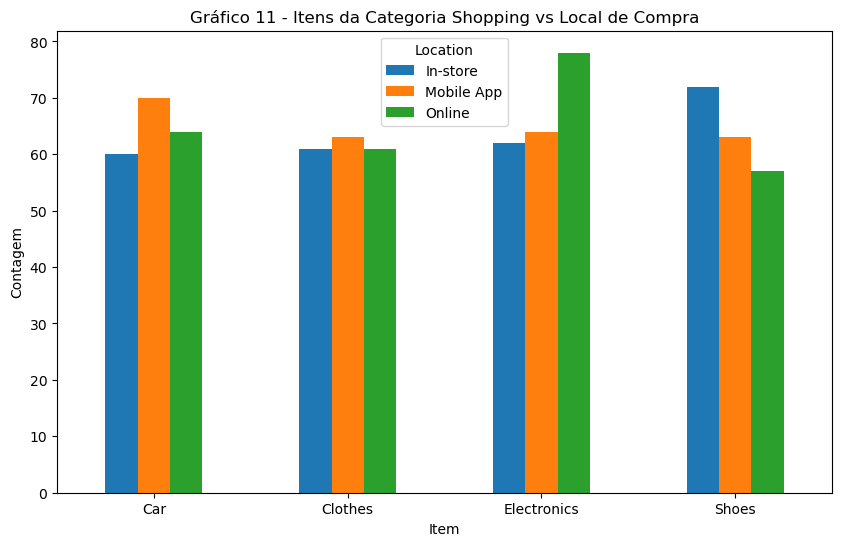

In [27]:
# Criar uma tabela pivot onde:
# - As linhas (index) serão os Items.
# - As colunas serão os Locations.
# - Os valores serão a Contagem.
pivot_df = contagem_locais_shopping.pivot(index='Item', columns='Location', values='Contagem')

# Plotar o gráfico de barras agrupadas
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Item")
plt.ylabel("Contagem")
plt.title("Gráfico 11 - Itens da Categoria Shopping vs Local de Compra")
plt.xticks(rotation=0)  # Gira os rótulos do eixo X, se necessário
plt.legend(title="Location")
plt.show()

## Conclusão

A análise dos hábitos de consumo revelou padrões interessantes quanto às categorias de produtos mais consumidas, formas de pagamento preferidas e locais onde as compras são realizadas.

1. **Forma de Pagamento (Gráficos 3 e 4)**:
   - Contrariando a hipótese inicial, o método de pagamento mais utilizado foi a carteira digital, seguido pelo cartão de crédito e pagamento em dinheiro. No entanto, a Carteira digital reune métodos de pagamento, ou seja, os pagamentos feitos por esse método podem se dividir entre crédito ou débito. 
   - No entanto, a análise do gasto médio por método de pagamento indicou que consumidores que utilizam carteiras digitais e dinheiro têm os maiores gastos médios, enquanto aqueles que usam cartões de débito apresentam um gasto médio menor.


2. **Local das Compras (Gráficos 5 e 6)**:
   - As compras foram distribuídas de maneira semelhante entre lojas físicas, online e aplicativos móveis.
   - Contudo, observa-se que compras realizadas online têm um ticket médio ligeiramente superior em comparação às feitas em lojas físicas, reforçando a tendência de gastos mais elevados no ambiente digital.


3. **Categorias de Consumo (Gráficos 7, 8, 9, 10, 11)**:
   - A categoria "Shopping" apresentou os valores mais elevados **(Gráfico 7)**, especialmente devido à venda de eletrônicos e automóveis, que possuem preços unitários muito superiores aos de outras categorias **(Gráfico 9)**.
   - Observou-se que os preços dos itens variam ao longo do tempo, especialmente na categoria "Shopping", que apresenta uma oscilação maior de preços **(Gráfico 7)**.
   - As pessoas tem preferência por comprar Eletrônicos online. **Observe Gráfico 11**.
   - Calçados são os itens da categoria Shopping mais comprados em lojas físicas. **Observe Grafico 11**. Isso pode estar associado ao fato de que calçados são os itens mais comuns de se errar o tamanho da compra. Segundo informações encontradas no site [Lider.Inc](https://www.lider.inc/noticias/e-commerce-especialista-aponta-tres-categorias-com-as-maiores-taxas-de-troca-e-devolucao), estes são os itens com maior taxa de troca e devolução, variando entre 25% e 30%.
   
   
4. **Considerações Finais**:
   - As hipóteses sobre o comportamento de compra foram parcialmente confirmadas. O uso de cartão de crédito não foi predominante, mas o ambiente digital ainda representa um local significativo de compras.
   - A tendência de aumento dos gastos em ambientes online sugere que estratégias comerciais e de marketing devem focar cada vez mais nessas plataformas.
   - Uma análise futura pode explorar com maior profundidade as variações sazonais do consumo e cruzar esses dados com eventos econômicos globais ou campanhas promocionais.
